# **Note proses pengerjaan coding:**
**I. Data-Preprocessing**
1. Baca Dataset
2. Cek jumlah data kosong
3. Cek tipe data
4. Drop kolom yang memiliki fitur yang gak mempengaruhi label (misalnya nama orang, id, dll)
5. Handle missing value
6. Lakukan encoding untuk data categorical
7. Handle Outlier
8. Lakukan scaling data (hanya untuk data X, para fitur)

**II. Model Selection**
1. Train test split
2. Handle imbalance class untuk data training (X_train,y_train)

**III. Creating machine learning model**
1. Import necessary sklearn libraries
2. train model (pake sklearn.algoritmanya)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [105]:
df.info()
# Alhamdulillah udah aman data typenya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [106]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [107]:
def print_null_report(df):
    for i, j in enumerate(df.isna().sum()):
        print(f'{df.columns[i]:15} | {j*100/len(df):.2f}%')

print_null_report(df)

ph              | 14.99%
Hardness        | 0.00%
Solids          | 0.00%
Chloramines     | 0.00%
Sulfate         | 23.84%
Conductivity    | 0.00%
Organic_carbon  | 0.00%
Trihalomethanes | 4.95%
Turbidity       | 0.00%
Potability      | 0.00%


In [108]:
# Handling missing value (gunakan imputasi untuk semuanya) berdasarkan class
df['ph'] = df.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.mean()))
df['Sulfate'] = df.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.mean()))
df['Trihalomethanes'] = df.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.mean()))

print_null_report(df)

ph              | 0.00%
Hardness        | 0.00%
Solids          | 0.00%
Chloramines     | 0.00%
Sulfate         | 0.00%
Conductivity    | 0.00%
Organic_carbon  | 0.00%
Trihalomethanes | 0.00%
Turbidity       | 0.00%
Potability      | 0.00%


In [109]:
# Handling Outlier

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1

    outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
    return outliers
    
def print_outlier(df):
    for i in df.columns:
        outliers = check_outlier(df[i])
        print(f'Number of Outliers for {i:16}:  {len(outliers)}')

def handle_outlier(df):
    for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Ku gunain teknik winsorizing: jadi nilai outlier akan diubah menjadi nilai lower bound atau upper bound tergantung dengan lokasi outliernya dimana
        df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
        df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])
    
        print(f'Column {i} has been processed')
    
print_outlier(df)

Number of Outliers for ph              :  142
Number of Outliers for Hardness        :  83
Number of Outliers for Solids          :  47
Number of Outliers for Chloramines     :  61
Number of Outliers for Sulfate         :  264
Number of Outliers for Conductivity    :  11
Number of Outliers for Organic_carbon  :  25
Number of Outliers for Trihalomethanes :  54
Number of Outliers for Turbidity       :  19
Number of Outliers for Potability      :  0


In [110]:
# print(handle_outlier(df))

In [111]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

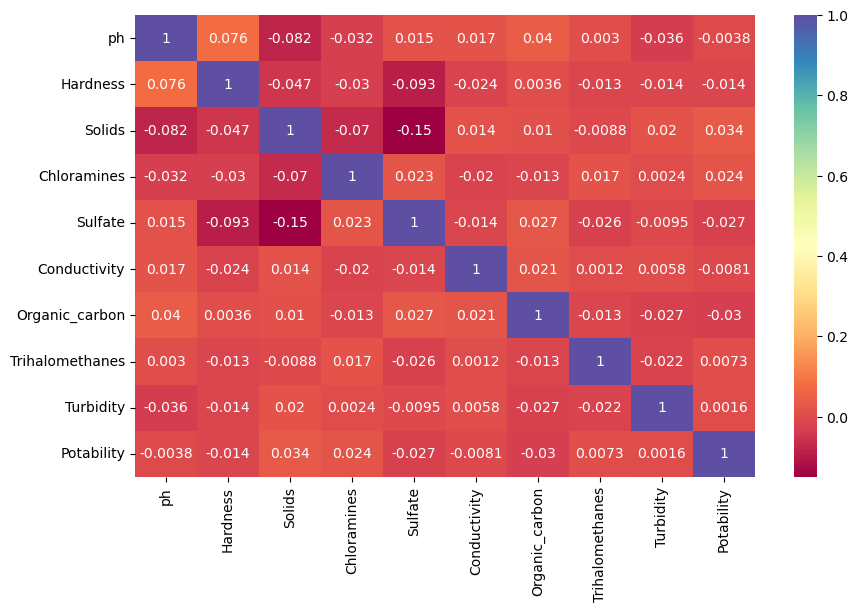

In [112]:
corr = df.corr()

plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Spectral')
plt.show()


In [113]:
corr['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007305
Turbidity          0.001581
ph                -0.003848
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.026957
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [114]:
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X = df.drop(['Potability'], axis = 1)
y = df['Potability']

X = sc.fit_transform(X)

In [115]:
# Model Selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.2, stratify= y)

# Smote (only oversample the training data)
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

In [116]:
# Creating the model (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KFold = StratifiedKFold(n_splits=10)
scores = cross_val_score(KNN, X, y, cv = KFold)

print('Cross Validation Score:', scores)
print('Average Cross Validation Score:', scores.mean())

Cross Validation Score: [0.5945122  0.59756098 0.61280488 0.6097561  0.64634146 0.59146341
 0.56269113 0.58715596 0.62691131 0.6146789 ]
Average Cross Validation Score: 0.6043876333258745


In [117]:
# Prediction
from sklearn.metrics import accuracy_score, classification_report
y_pred_KNN = KNN.predict(X_test)

print('The Model accuracy is:', accuracy_score(y_pred_KNN, y_test))
print(classification_report(y_pred_KNN, y_test))


The Model accuracy is: 0.6097560975609756
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       506
           1       0.29      0.50      0.37       150

    accuracy                           0.61       656
   macro avg       0.55      0.57      0.54       656
weighted avg       0.69      0.61      0.64       656



In [118]:
# SVM Model plus regularisasi
from sklearn.svm import LinearSVC
l1 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol = 1e-3)
l1.fit(X_train, y_train)

KFold3 = StratifiedKFold(n_splits=10)
scores3 = cross_val_score(l1, X, y, cv = KFold3)

print('Cross Validation Score:', scores3)
print('Average Cross Validation Score:', scores3.mean())

Cross Validation Score: [0.6097561  0.6097561  0.6097561  0.6097561  0.6097561  0.6097561
 0.6146789  0.6116208  0.60856269 0.60856269]
Average Cross Validation Score: 0.6101961661818454


In [119]:
# Prediction
y_pred_SVM = l1.predict(X_test)
print('The Model accuracy is: ', accuracy_score(y_pred_SVM, y_test))
print(classification_report(y_pred_SVM, y_test))

The Model accuracy is:  0.6097560975609756
              precision    recall  f1-score   support

           0       1.00      0.61      0.76       656
           1       0.00      0.00      0.00         0

    accuracy                           0.61       656
   macro avg       0.50      0.30      0.38       656
weighted avg       1.00      0.61      0.76       656



c:\Users\kevin_9brmunc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kevin_9brmunc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kevin_9brmunc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [120]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

XGB = XGBClassifier()
XGB_params = {
   'eta': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4]
    }

skf = StratifiedKFold(n_splits=5)

rs_xgb = GridSearchCV(estimator=XGB, param_grid=XGB_params, cv=skf)
rs_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [1, 2, 3, 4]})

In [126]:
xgb = rs_xgb.best_estimator_
# print(xgb)

y_pred_xgb = xgb.predict(X_test)
print('The Model accuracy is: ', accuracy_score(y_test, y_pred_xgb))
print('training score:', xgb.score(X_train, y_train))
print(classification_report(y_test, y_pred_xgb))

The Model accuracy is:  0.7804878048780488
training score: 0.8900763358778626
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       400
           1       0.79      0.60      0.68       256

    accuracy                           0.78       656
   macro avg       0.78      0.75      0.76       656
weighted avg       0.78      0.78      0.77       656



In [122]:
print(cross_val_score(xgb, X_train, y_train, cv=skf))

[0.79389313 0.78435115 0.78625954 0.78244275 0.79198473]


In [123]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)

print('The Model accuracy is: ', accuracy_score(y_test, y_pred_lr))
print(LR.score(X_train, y_train))

The Model accuracy is:  0.6097560975609756
0.6099236641221374
